In [42]:
# Imports etc
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data = 50 + 25 * torch.randn(1000)

hist = torch.histc(data, bins=10, min=0, max=100)

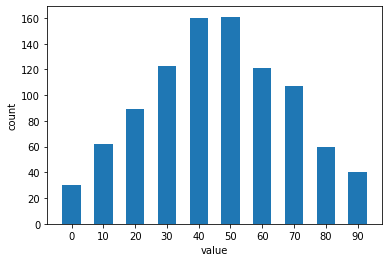

In [44]:
plt.xticks(np.arange(0, 100, 10))
plt.xlabel('value')
plt.ylabel('count')
_ = plt.bar(np.arange(0, 100, 10), hist, width=5.8)

In [45]:
class GaussianHistogram(nn.Module):
    def __init__(self, bins, min, max, sigma):
        super(GaussianHistogram, self).__init__()
        self.bins = bins
        self.min = min
        self.max = max
        self.sigma = sigma
        self.delta = float(max - min) / float(bins)
        self.centers = float(min) + self.delta * (torch.arange(bins).float() + 0.5)

    def forward(self, x):
        x = torch.unsqueeze(x, 0) - torch.unsqueeze(self.centers, 1)
        x = torch.exp(-0.5*(x/self.sigma)**2) / (self.sigma * np.sqrt(np.pi*2)) * self.delta
        x = x.sum(dim=1)
        return x

In [49]:
gausshist = GaussianHistogram(bins=10, min=0, max=100, sigma=6)

data.requires_grad = True
hist = gausshist(data)
int_hist = hist.detach().cpu().numpy().astype('int')

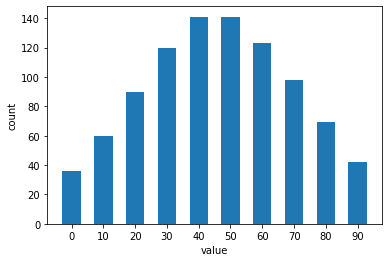

In [50]:
plt.xticks(np.arange(0, 100, 10))
plt.xlabel('value')
plt.ylabel('count')
_ = plt.bar(np.arange(0, 100, 10), int_hist, width=5.8)

In [48]:
hist.sum().backward()
data.grad

tensor([ 9.9972e-04, -7.5602e-04,  4.6677e-04,  1.0152e-03, -1.0128e-03,
        -9.4010e-04, -8.9126e-04,  4.4636e-03, -3.0685e-04,  1.0224e-03,
         8.9662e-04,  8.9646e-04, -2.7056e-04,  2.1339e-04,  6.8102e-04,
        -3.3821e-04,  4.6433e-04, -7.3197e-04,  7.7474e-04,  3.4131e-02,
        -4.0192e-04,  6.5413e-04, -1.0290e-03, -6.6107e-02,  1.0281e-03,
         9.4600e-04,  2.7535e-04,  7.5853e-02,  5.6824e-04,  4.9506e-02,
        -1.5353e-04, -3.6939e-04,  6.0077e-04, -6.3193e-04,  1.0194e-03,
        -9.7556e-04, -6.5150e-03, -1.0300e-03,  1.2183e-02,  5.5202e-04,
        -4.1014e-05, -1.0303e-03,  1.0172e-03, -1.1143e-04,  6.4536e-04,
         1.0043e-03,  7.1806e-04,  4.2072e-04,  9.6834e-04,  4.9040e-04,
         4.0815e-04, -9.1645e-04, -2.5197e-03,  6.3225e-04,  4.9536e-02,
         7.5105e-04, -9.7263e-04, -5.6081e-04, -6.1187e-04,  8.3603e-04,
        -6.9377e-04, -6.9012e-12, -4.0113e-04,  3.1809e-02,  1.5537e-04,
         5.0340e-04, -8.7371e-04,  4.1509e-04,  3.8